In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
#import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
# initiating random number
np.random.seed(11)

In [2]:
#### Creating the dataset
# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1
# Constant to make the second distribution different from the first
# x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0.5, 0.5, 0.5, 0.5
x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0, 1, 0, 1
# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1,
 40) - 0,
 'x2': np.random.normal(mu_x1, sigma_x1,
 40) - 0,'type': 0})
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1,
 40) + 1,
 'x2': np.random.normal(mu_x1, sigma_x1,
 40) - 0,'type': 0})
d3 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1,
 40) + 1,
 'x2': np.random.normal(mu_x1, sigma_x1,
 40) + 1,'type': 1})
d4 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1,
 40) - 0,
 'x2': np.random.normal(mu_x1, sigma_x1,
 40) + 1, 'type': 0})
data = pd.concat([d1, d2, d3, d4], ignore_index=True)


In [3]:
def sig(s): # Activation function
      return 1 / (1 + np.exp(-s))
def sig_prime(s): # Derivative of the sig
      return sig(s) * (1 - sig(s))

class FFNN(object):
      def __init__(self, input_size=2, hidden_size=2, output_size=1):
 # Adding 1 as it will be our bias
            self.input_size = input_size + 1
            self.hidden_size = hidden_size + 1
            self.output_size = output_size
            self.o_error = 0
            self.o_delta = 0
            self.z1 = 0
            self.z2 = 0
            self.z3 = 0
            self.z2_error = 0
 # The whole weight matrix, from the inputs till thehidden layer
            self.w1 = np.random.randn(self.input_size, self.hidden_size)
 # The final set of weights from the hidden layer tillthe output layer
            self.w2 = np.random.randn(self.hidden_size, self.output_size)
      
      def forward(self, X):
 # Forward propagation through our network
            X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
            self.z1 = np.dot(X, self.w1) # dot product of X (input) and first set of 3x2 weights
            self.z2 = sig(self.z1) # activation function
            self.z3 = np.dot(self.z2, self.w2) # dot product of hidden layer (z2) and second set of 3x1 weights
            o = sig(self.z3) # final activation function
            return o
       
      def predict(self, X):
            return forward(self, X)
      def backward(self, X, y, output, step):
 # Backward propagation of the errors
            X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
            self.o_error = y - output # error in output
            self.o_delta = self.o_error * sig_prime(output) * step # applying derivative of sig to error
            self.z2_error = self.o_delta.dot(
            self.w2.T) # z2 error: how much our hidden layer weights contributed to output error
            self.z2_delta = self.z2_error * sig_prime(self.z2) * step #applying derivative of sig to z2 error
            self.w1 += X.T.dot(self.z2_delta) # adjusting first of weights
            self.w2 += self.z2.T.dot(self.o_delta) # adjusting second set of weights

      def fit(self, X, y, epochs=10, step=0.05):
            for epoch in range(epochs):
                  X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
                  output = self.forward(X)
                  self.backward(X, y, output, step)
      def forward(self, X):
 # Forward propagation through our network
            X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
            self.z1 = np.dot(X, self.w1) # dot product of X (input) and first set of 3x2 weights
            self.z2 = sig(self.z1) # activation function
            self.z3 = np.dot(self.z2, self.w2) # dot product of hidden layer (z2) and second set of 3x1 weights
            o = sig(self.z3) # final activation function
            return o
       
      def predict(self, X):
            return forward(self, X)
      def backward(self, X, y, output, step):
 # Backward propagation of the errors
            X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
            self.o_error = y - output # error in output
            self.o_delta = self.o_error * sig_prime(output) * step # applying derivative of sig to error
            self.z2_error = self.o_delta.dot(
            self.w2.T) # z2 error: how much our hidden layer weights contributed to output error
            self.z2_delta = self.z2_error * sig_prime(self.z2) * step #applying derivative of sig to z2 error
            self.w1 += X.T.dot(self.z2_delta) # adjusting first of weights
            self.w2 += self.z2.T.dot(self.o_delta) # adjusting second set of weights

      def fit(self, X, y, epochs, step):
            for epoch in range(epochs):
                  X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
                  output = self.forward(X)
                  self.backward(X, y, output, step)


In [6]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8
# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1', 'x2']][msk], data[['type']][msk].values
# Everything else will go into the validation set
test_x, test_y = data[['x1', 'x2']][~msk], data[['type']][~msk].values 
my_network = FFNN()
my_network.fit(train_x, train_y, epochs=1000, step=0.05)
pred_y = test_x.apply(my_network.forward, axis=1)
# Reshaping the data
test_y_ = [i[0] for i in test_y]
pred_y_ = [i[0] for i in pred_y]
print('MSE: ', mean_squared_error(test_y_, pred_y_))
print('AUC: ', roc_auc_score(test_y_, pred_y_))
threshold = 0.5
pred_y_binary = [1 if i > threshold else 0 for i in pred_y_]
cm = confusion_matrix(test_y_, pred_y_binary, labels=[0, 1])
print(pd.DataFrame(cm,
 index=['True 0', 'True 1'],
 columns=['Predicted 0', 'Predicted 1']))


MSE:  0.0036273830184168363
AUC:  1.0
        Predicted 0  Predicted 1
True 0           29            0
True 1            0            9


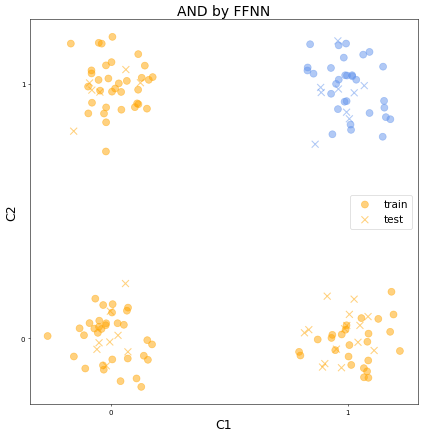

In [7]:
cmap_light = ListedColormap(["orange", "cornflowerblue"])
classes = ["False", "True"]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10., 10.), dpi = 50)
ax.scatter(train_x.iloc[:,0], train_x.iloc[:,1], s=100., c=train_y, cmap=cmap_light, alpha=0.5, label='train')
ax.scatter(test_x.iloc[:,0], test_x.iloc[:,1], s=100., c=pred_y, cmap=cmap_light, marker='x', alpha=0.5, label='test')
#ax.plot(np.array(ax.get_xlim()) , PredictBoundary(w0, w1,w2, np.array(ax.get_xlim())), '--', c='red', label='Hyperplane')
ax.set_xlabel('C1', fontsize=18)
ax.set_ylabel('C2', fontsize=18)
ax.set_title('AND by FFNN', fontsize=20)
plt.xticks(np.asarray([0,1]))
plt.yticks(np.asarray([0,1])) 
ax.legend(fontsize=15)
#plt.figtext(0.5, 0.01, r"$w_0$ = {:03.2f}, $w_1$ = {:03.2f}, $w_2$ = {:03.2f}".format(w0,w1,w2), ha="center", fontsize=18)
plt.show()